<a href="https://colab.research.google.com/github/Kannaraj523/Carit11/blob/master/Capstoneproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# check pytorch installation: 
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("1.9")   # please manually install torch 1.9 if Colab changes its default version

1.9.0+cu102 False


In [4]:
!pip install pyyaml==5.1
# This is the current pytorch version on Colab. Uncomment this if Colab changes its pytorch version
# !pip install torch==1.9.0+cu102 torchvision==0.10.0+cu102 -f https://download.pytorch.org/whl/torch_stable.html

# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

     |████████████████████████████████| 274 kB 7.5 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=3df1a78f3f69fe3efb5cb50ce6211335abf14363859990d89f8edfef5d991209
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html
     |████████████████████████████████| 6.4 MB 1.9 MB/s 
     |████████████████████████████████| 74 kB 3.2 MB/s 
     |████████████████████████████████| 145 kB 31.5 MB/s 
     |████████████████████████████████| 130 kB 59.5 MB/s 
     |████████████████████████████████| 49 kB 8.1 MB/s 
     |████████████████████████████████| 743 kB 60.6 MB/s 
     |████████████████████████████████| 747 kB 57.9 MB/s 
     |██

In [5]:
import cv2 as cv
import json
#from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode
from detectron2 import model_zoo
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.modeling import build_model
import torch
import numpy as np
from PIL import Image



In [6]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

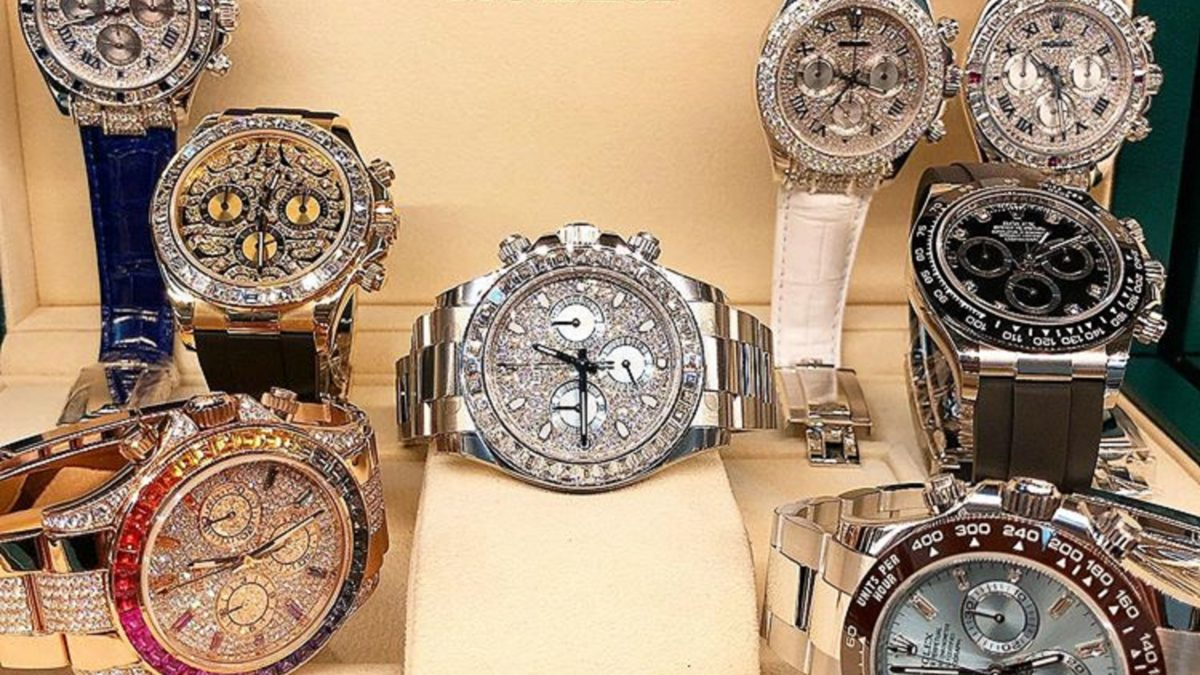

In [8]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
image = cv.imread("/content/rolex4-1200x675.jpg")
cv2_imshow(image)

In [9]:
import cv2 as cv
import json
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode
from detectron2 import model_zoo
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.modeling import build_model
import torch
import numpy as np
from PIL import Image

class Detector:

	def __init__(self):

		# set model and test set
		self.model = 'mask_rcnn_R_50_FPN_3x.yaml'

		# obtain detectron2's default config
		self.cfg = get_cfg() 

		# load values from a file
		# self.cfg.merge_from_file("test.yaml")
		self.cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/"+self.model)) 

		# set device to cpu
		self.cfg.MODEL.DEVICE = "cpu"

		# get weights 
		self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/"+self.model) 
		# self.cfg.MODEL.WEIGHTS = "model_final_f10217.pkl"

		# set the testing threshold for this model
		self.cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  

		# build model from weights
		# self.cfg.MODEL.WEIGHTS = self.convert_model_for_inference()

	# build model and convert for inference
	def convert_model_for_inference(self):

		# build model
		model = build_model(self.cfg)

		# save as checkpoint
		torch.save(model.state_dict(), 'checkpoint.pth')

		# return path to inference model
		return 'checkpoint.pth'

	# detectron model
	# adapted from detectron2 colab notebook: https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5	
	def inference(self, file):

		predictor = DefaultPredictor(self.cfg)
		im = cv.imread(image)
		outputs = predictor(im)
        #Changes made by Kannaraj - Sep 30
    #print(outputs["instances"].pred_classes)
    #print(outputs["instances"].pred_boxes)

		# with open(self.curr_dir+'/data.txt', 'w') as fp:
		# 	json.dump(outputs['instances'], fp)
		# 	# json.dump(cfg.dump(), fp)

		# get metadata
		metadata = MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0])

		# visualise
		v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=1.2)
		v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

		# get image 
		img = Image.fromarray(np.uint8(v.get_image()[:, :, ::-1]))

		# write to jpg
		cv2_imshow(im)

		#return img





In [33]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(image)

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [40]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
import numpy as np
from fvcore.transforms import CropTransform

print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

#output_dict=[]
class_name=[]
pred_classes = outputs['instances'].pred_classes.cpu().tolist()
class_names = MetadataCatalog.get("mydataset").thing_classes
pred_class_names = list(map(lambda x: class_names[x], pred_classes))
for i in pred_class_names:
  print(pred_class_names[i])


class1=outputs["instances"].pred_classes
print(class1)
box=outputs["instances"].pred_boxes
print(box)

box=box.tensor.cpu().numpy()
cord=[]
for i in range(len(box)):
  for j in range(len(box[i])):
      val=(box[i][j])
      cord.append(int(val))

print(cord)

for i in range(0,len(cord),4):
#def cropimg(x,y,w,h):
   ct = CropTransform(cord[i],cord[i+1],cord[i+2],cord[i+3])
   crop_img = ct.apply_image(image)
   #cv2_imshow(crop_img)
   resize1(crop_img)
   
   
def resize1(crop_img):
  scale_percent = 60 # percent of original size
  width = int(crop_img.shape[1] * scale_percent / 100)
  height = int(crop_img.shape[0] * scale_percent / 100)
  dim = (width, height)
  resized_img = cv2.resize(crop_img, dim, interpolation = cv2.INTER_AREA)
  saving(resized_img)
  return cv2_imshow(resized_img)

#def saving(resized_img):

 


tensor([74, 74, 74, 74, 74, 74, 74, 56, 56], device='cuda:0')
Boxes(tensor([[ 470.3344,  252.4494,  703.1843,  489.9952],
        [ 850.4363,  536.1628, 1157.4779,  674.1902],
        [ 762.6393,    4.2766,  937.2297,  161.0425],
        [ 961.6245,    0.0000, 1147.6239,  167.0184],
        [ 156.6619,  120.0653,  369.7727,  314.0666],
        [ 124.3711,  443.0540,  363.3781,  665.4924],
        [ 912.5449,  176.6422, 1142.7532,  350.6245],
        [ 776.3658,  367.7237,  812.7455,  437.4416],
        [ 782.7560,  367.5120,  837.3625,  441.0154]], device='cuda:0'))


AttributeError: ignored

In [ ]:
v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])
im1=out.get_image()[:, :, ::-1]

In [ ]:
from detectron2.data.transforms import CropTransform
#cropimg(317,1,640,357)

x=317
y=1
w=640
h=357
def cropimg(x,y,w,h):
  ct = CropTransform(x,y,w,h)
  crop_img = ct.apply_image(im1)
  #return cv2_imshow(crop_img)
  cv2_imshow(crop_img)

  


In [ ]:
#import cv2 as cv2
#import json
#from google.colab.patches import cv2_imshow

#from google.colab.patches import cv2_imshow

#vidcap = cv2.VideoCapture('/content/Frame1.mp4')

#vidcap.set(cv2.CAP_PROP_POS_MSEC,9000)      # just cue to 20 sec. position

#success,image = vidcap.read()


#success = True

#while success:

#if success:

 #   cv2.imwrite("Newfram9sec.jpg", image)     # save frame as JPEG file

  #  cv2_imshow(image)

   # cv2.waitKey() 

 #if cv2.waitKey(10) == 27:                     # exit if Escape is hit



     # break

#count += 1
